<center>
    <img src="https://t1.gstatic.com/images?q=tbn:ANd9GcSMy0KygIfd3WFFlrITlvBedzZqwfdBt5HKwjR_8JW5ZU4pkxYd"  />
</center>

## Fare Prediction for Uber
#### DESCRIPTION
Design an algorithm that will tell the fare to be charged for a passenger.
##### Problem Statement Scenario:
A fare calculator helps a customer in indentifying the fare valid for the trip. They are often used by passengers who are new to a city or tourists to get an estimate of the travel costs.
You are provided with a dataset with features like fare amount, pickup and drop location, passrnger count, and so on.

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
train="https://drive.google.com/file/d/1Yp_1LWg4rtBj6ezbu6AqGRO8LpFUdYiD/view"

In [3]:
df_train=pd.read_csv("train.csv",nrows=1000000) #1 Millian data= 10lakh
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df_test=pd.read_csv("test.csv")
df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [5]:
print("Train data",df_train.shape)
print("Test data", df_test.shape)

Train data (1000000, 8)
Test data (9914, 7)


In [6]:
print("Train data")
print(df_train.info())
print("\n")
print("Test data\n")
print(df_test.info())

Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB
None


Test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 

### Change the type of pickup_datetime from object to DateTime

In [7]:
df_train["pickup_datetime"]=pd.to_datetime(df_train['pickup_datetime'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   key                1000000 non-null  object             
 1   fare_amount        1000000 non-null  float64            
 2   pickup_datetime    1000000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   1000000 non-null  float64            
 4   pickup_latitude    1000000 non-null  float64            
 5   dropoff_longitude  999990 non-null   float64            
 6   dropoff_latitude   999990 non-null   float64            
 7   passenger_count    1000000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 61.0+ MB


In [8]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


**Minimum fare amount can't be negative**

**Minimum Passenger_count can't be zero**

So, Remove the -ve and zero value data of fare and passenger counts

In [9]:
df_train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

###### Here we can see there are 1, 1 null values in dropoff longitude and latitude. as removing 2 rows from our huge dataset will not affect our analysis so, lets remove the rows having null values

In [10]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\PawanKrGunjan\VENV\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

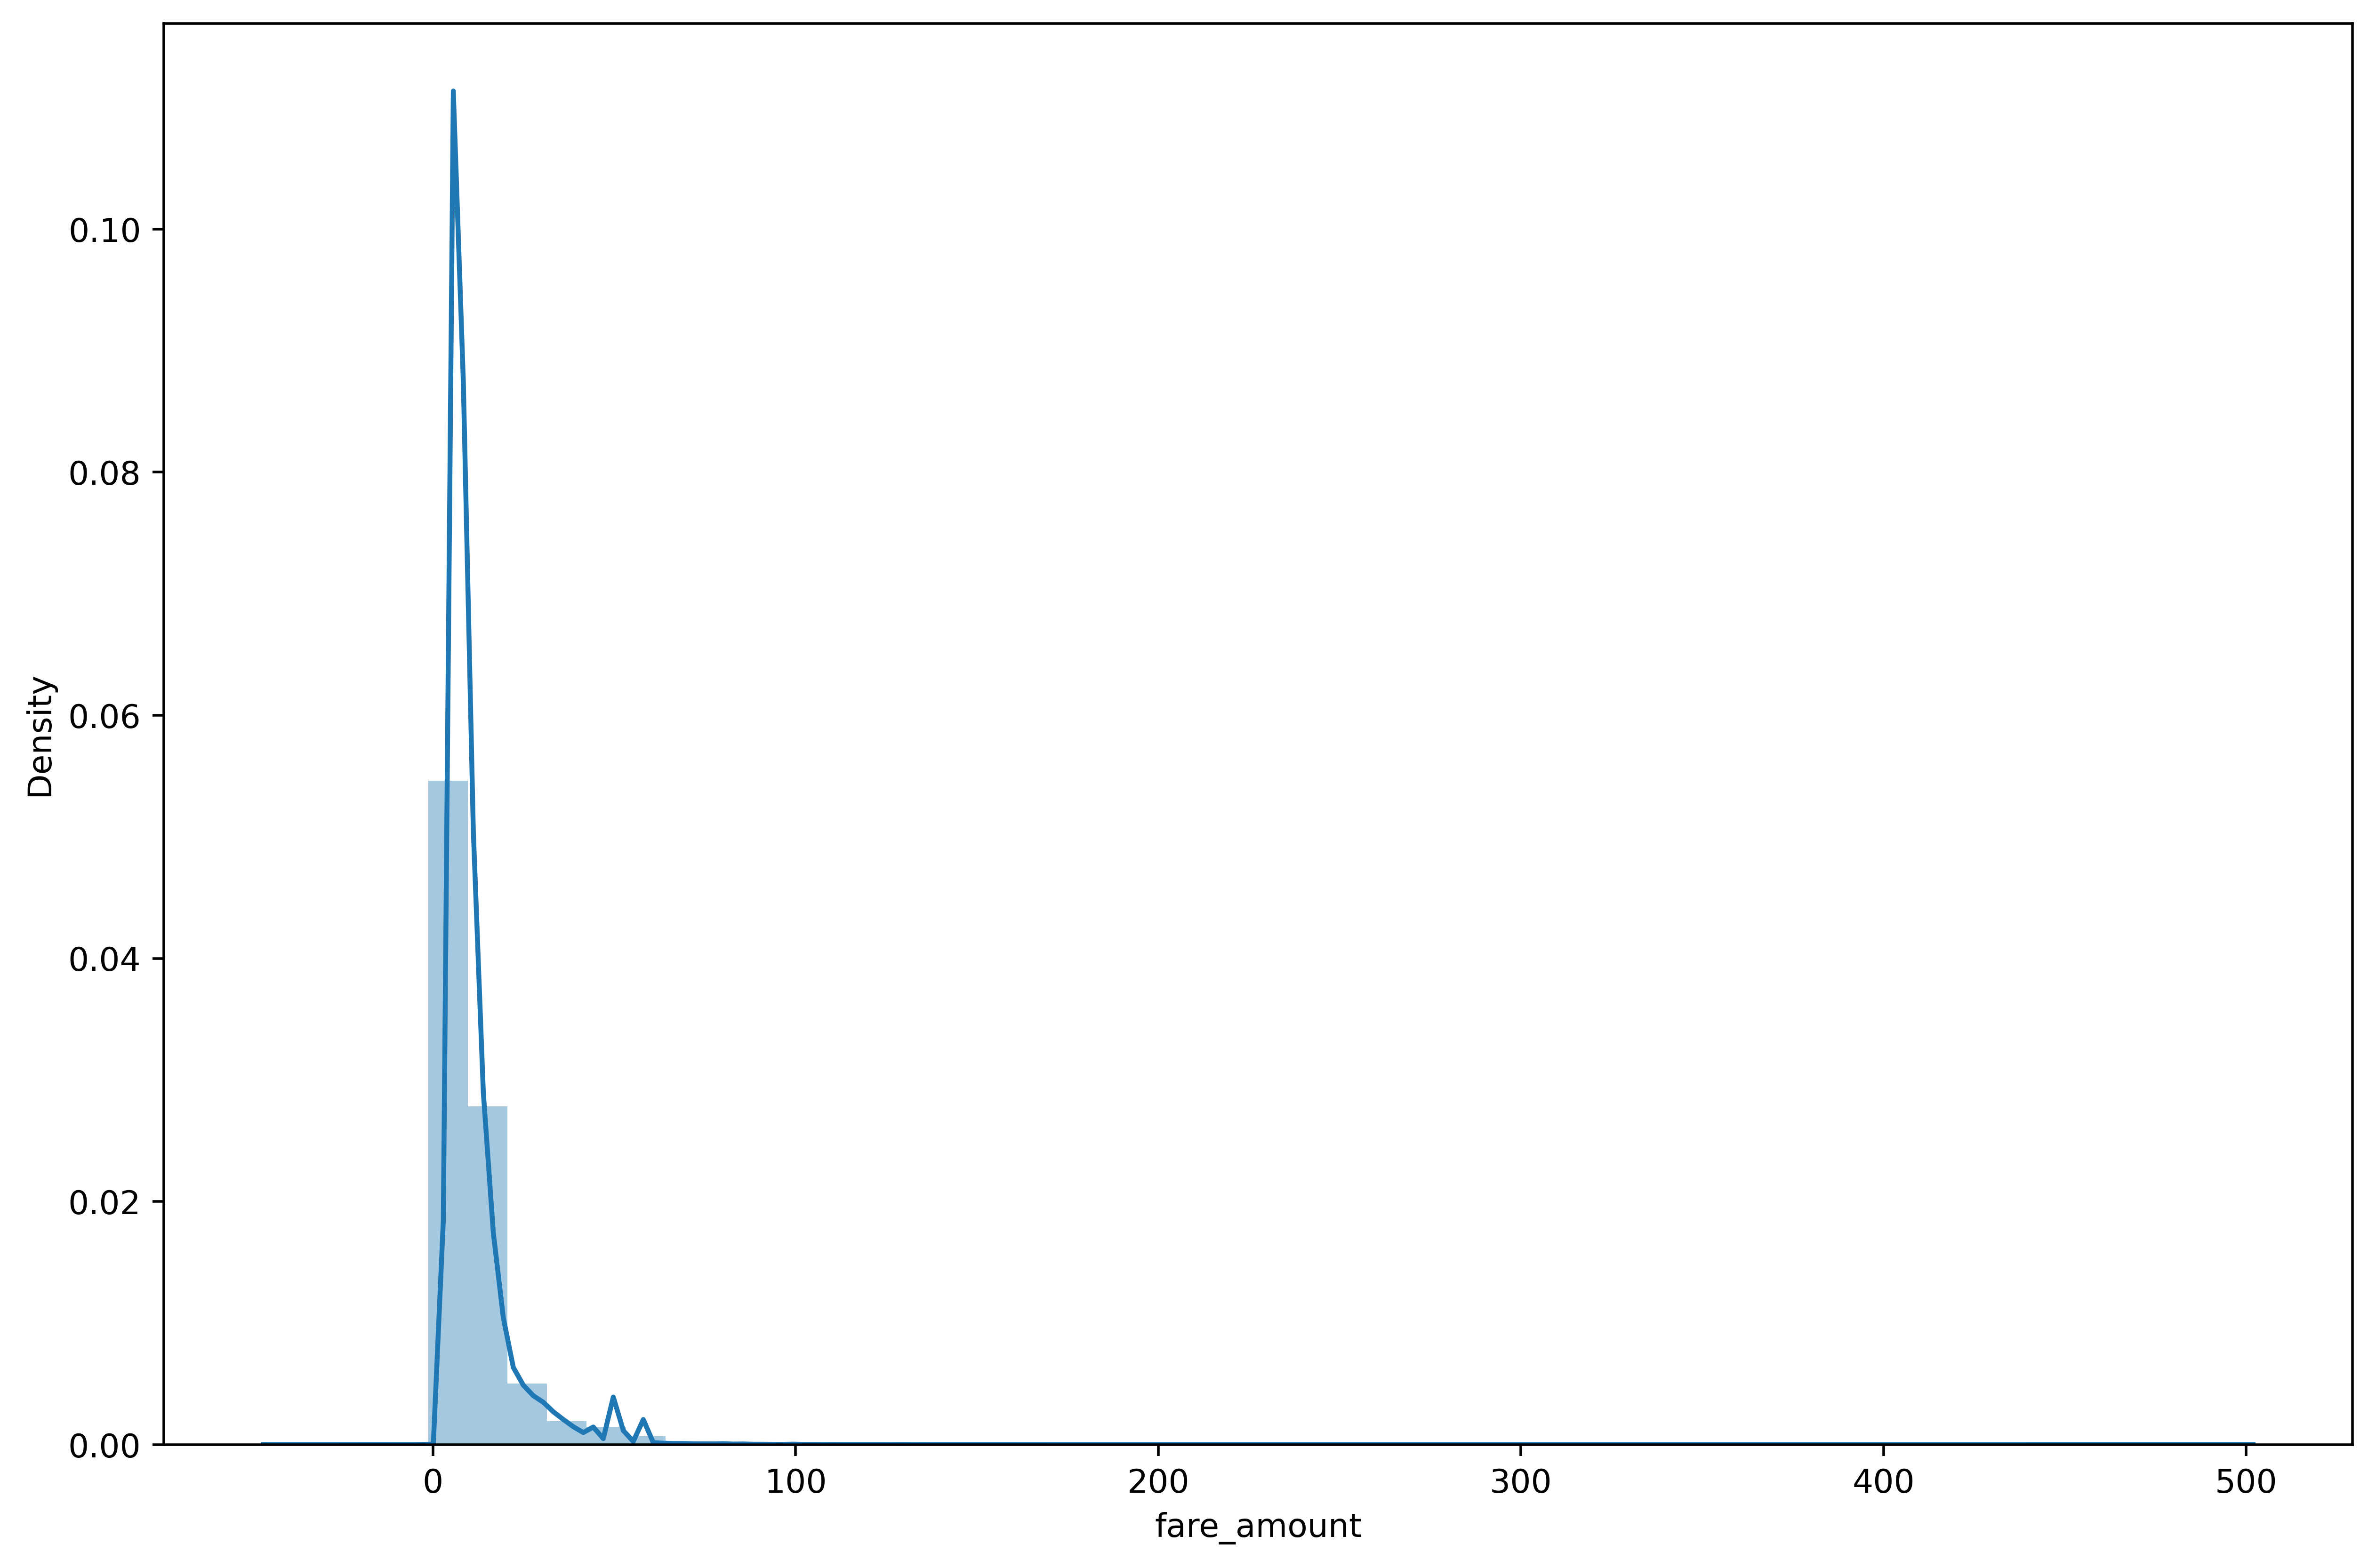

In [12]:
fig = plt.figure(figsize=(12,8), dpi=500)
sns.distplot(df_train['fare_amount'])

c:\PawanKrGunjan\VENV\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_latitude', ylabel='Density'>

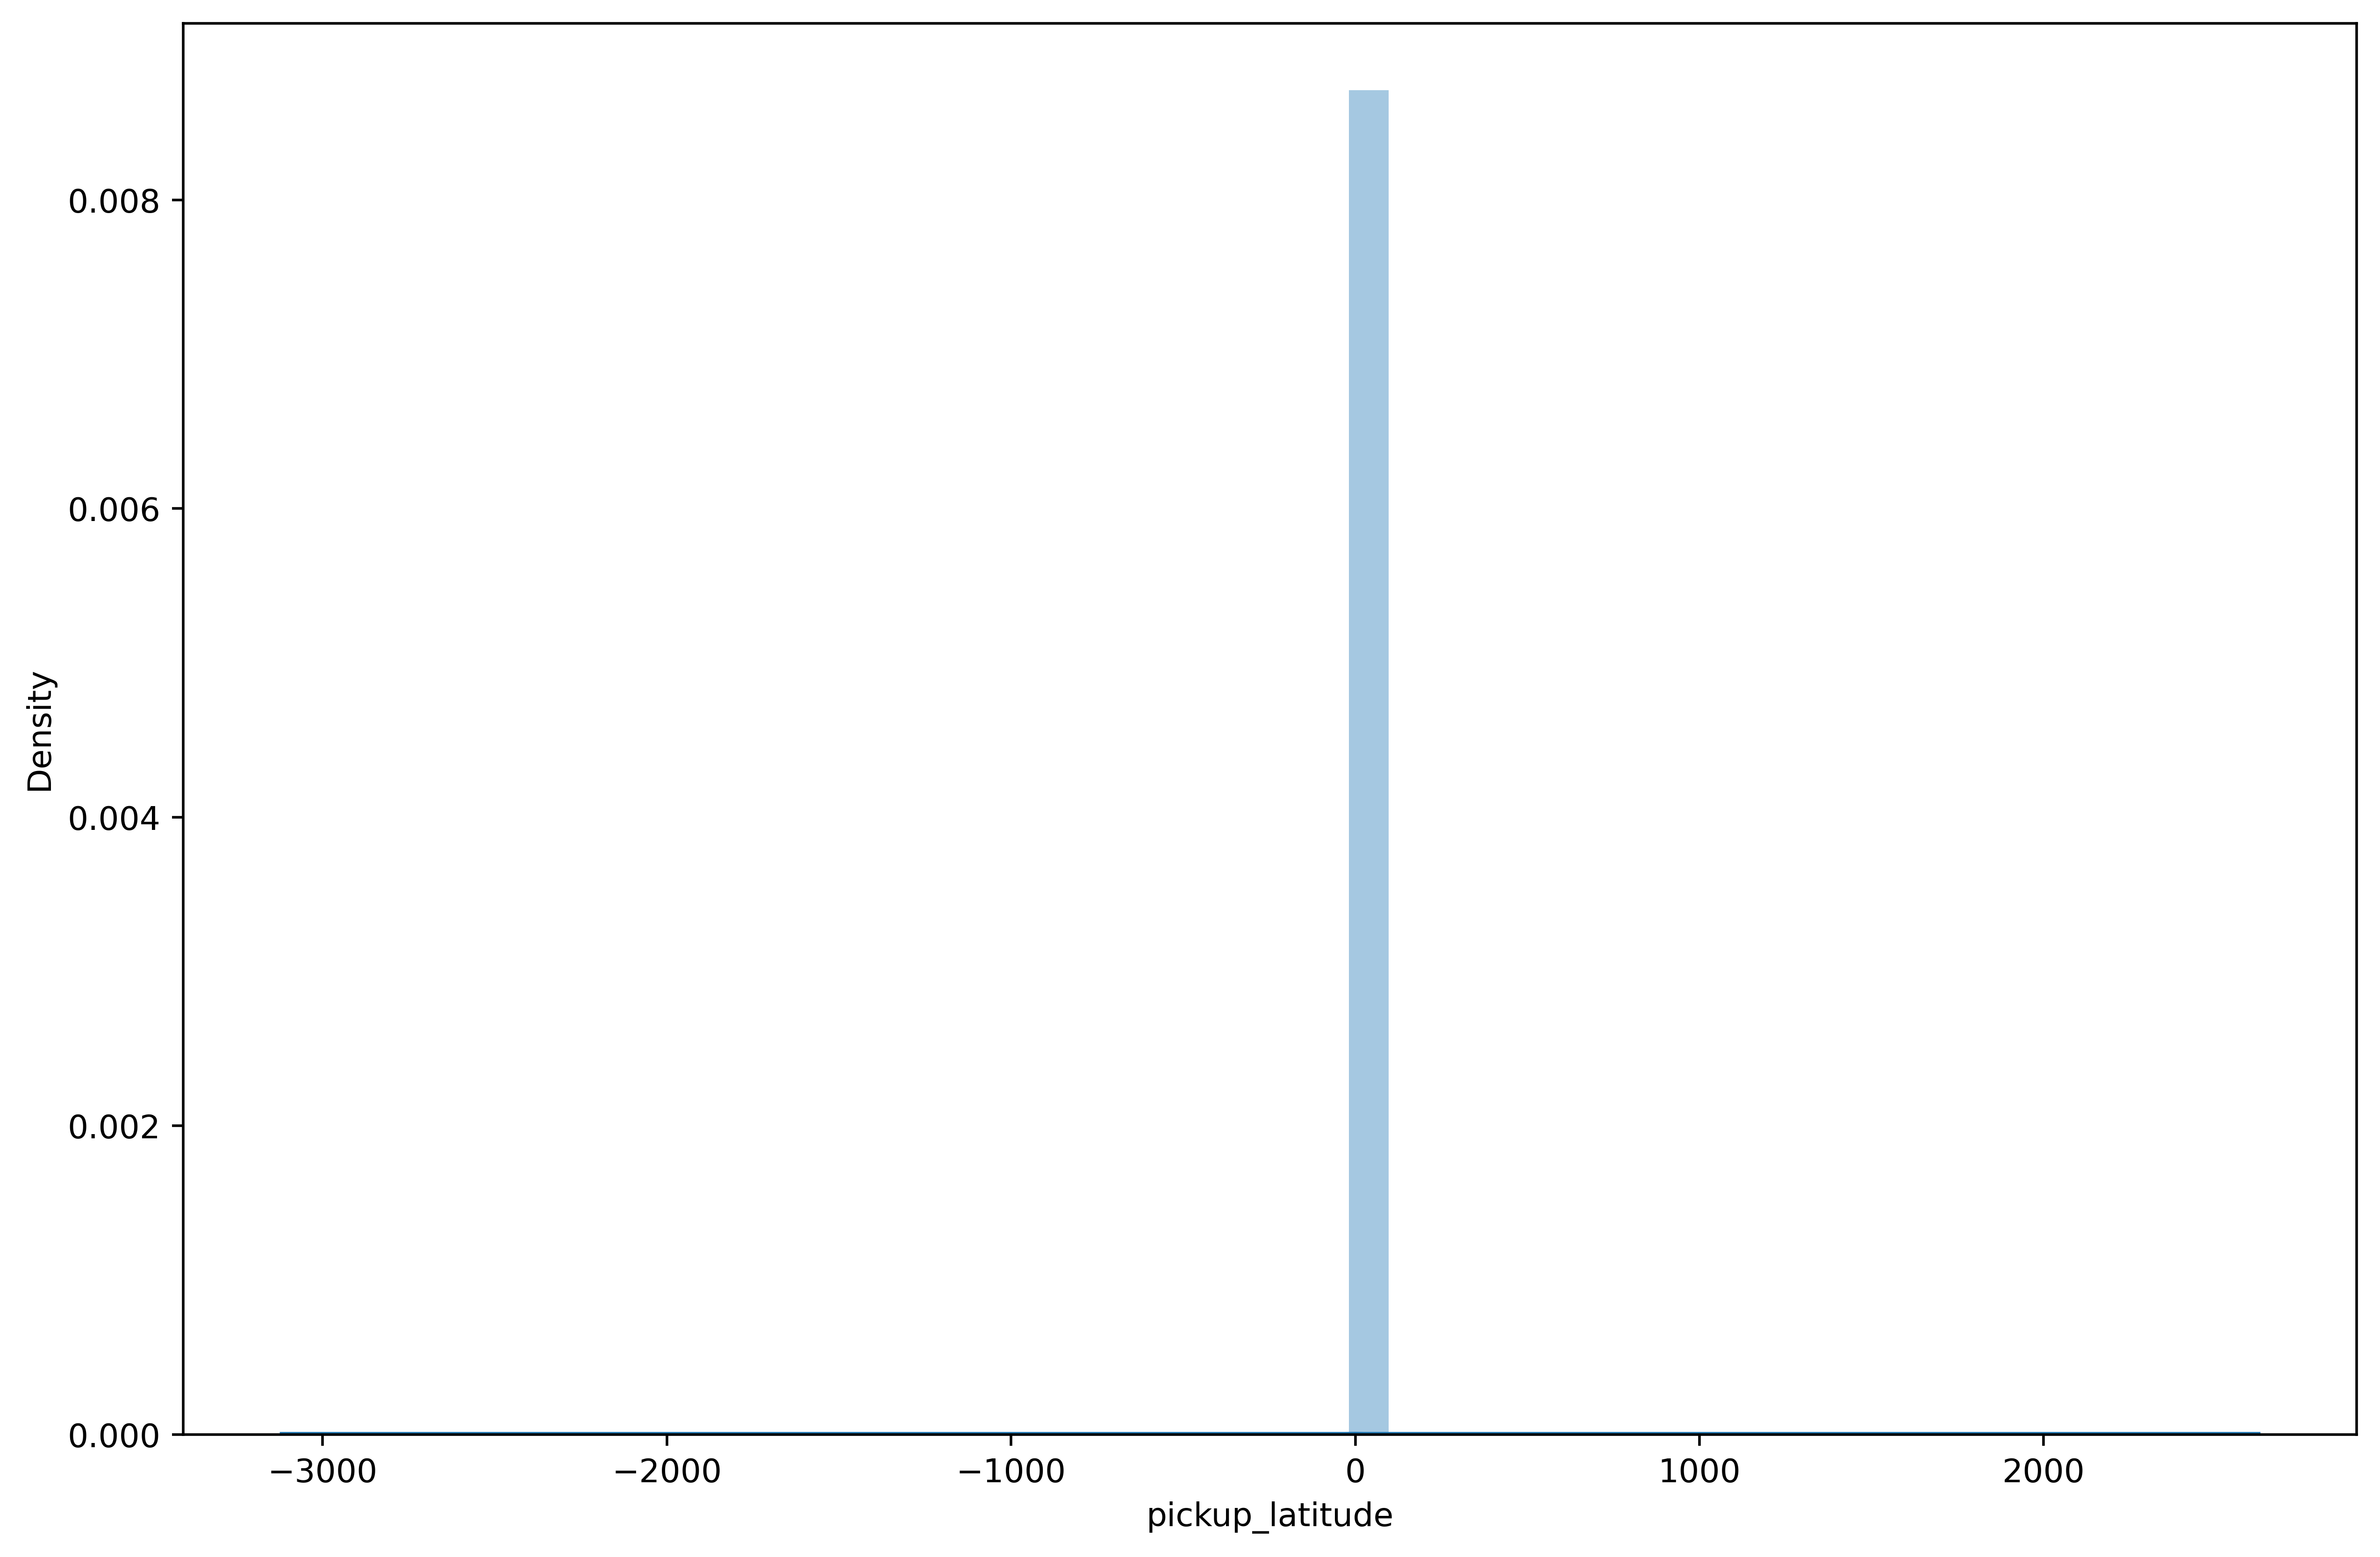

In [13]:
fig = plt.figure(figsize=(12,8), dpi=500)
sns.distplot(df_train['pickup_latitude'])

c:\PawanKrGunjan\VENV\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_longitude', ylabel='Density'>

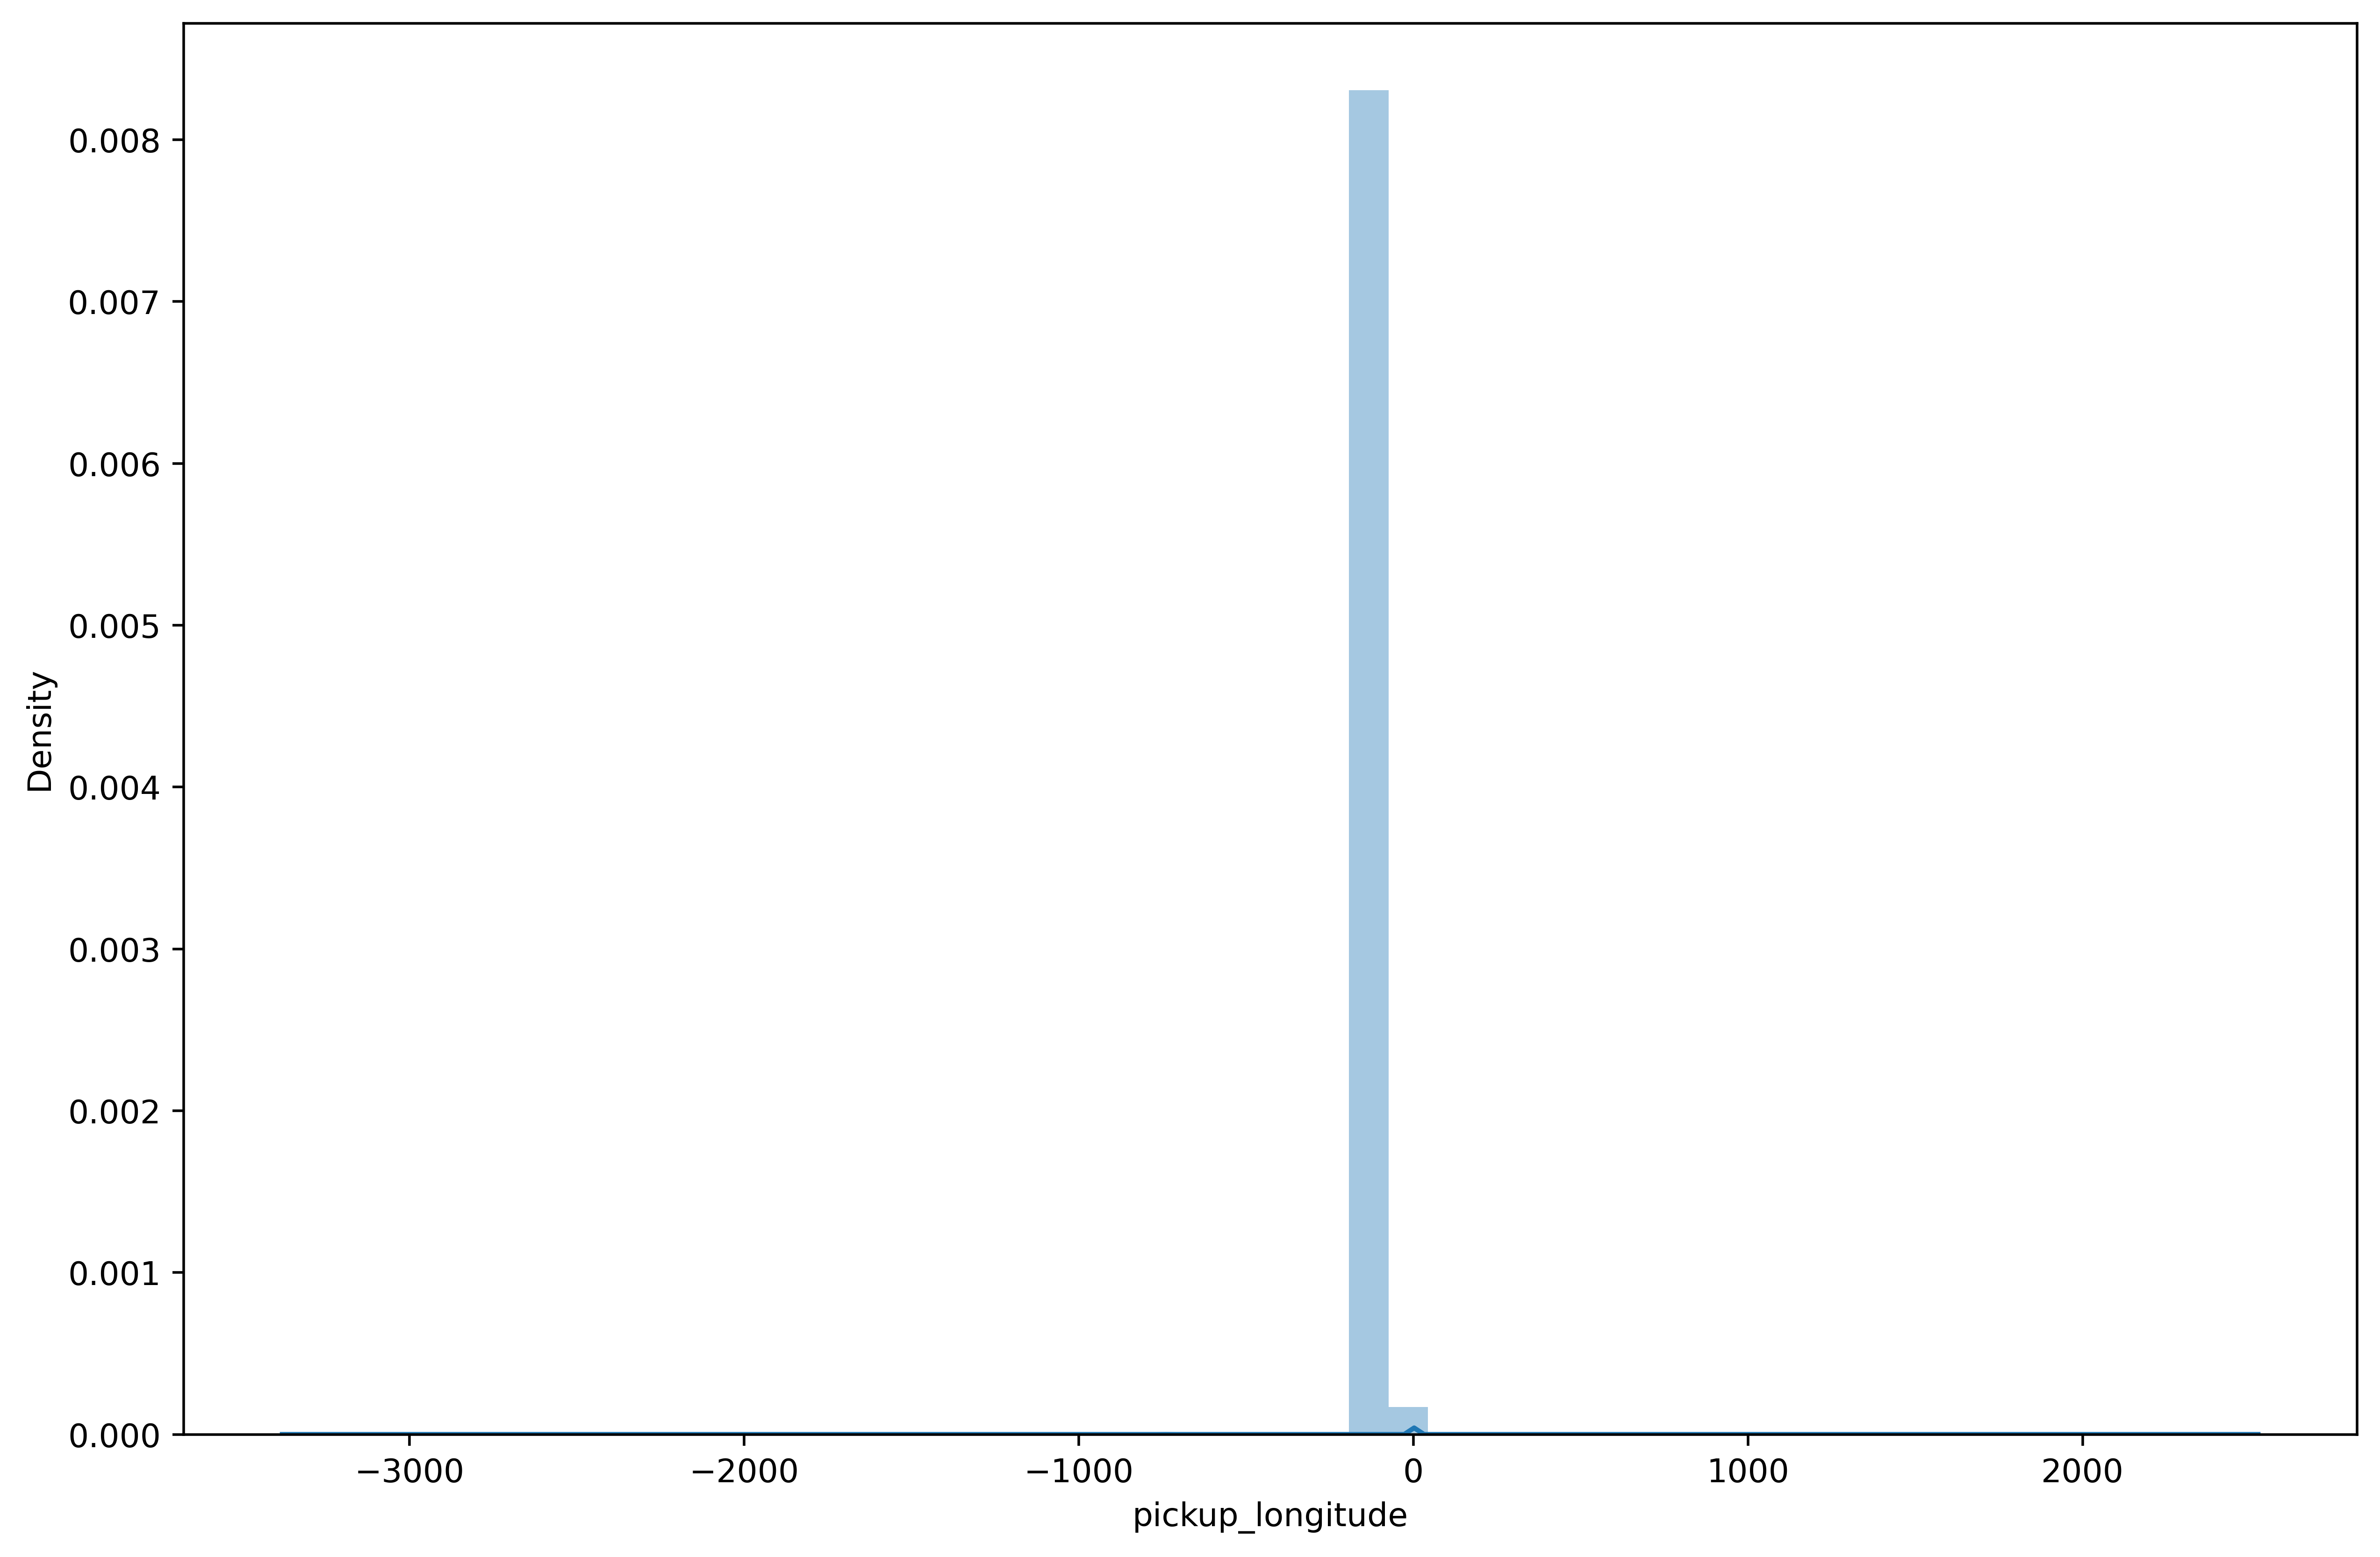

In [14]:
fig = plt.figure(figsize=(12,8), dpi=500)
sns.distplot(df_train['pickup_longitude'])

In [15]:
#here also we have noisy data as given value of dropoff_latitude and longitude are excedding
#lets look min and max value in test dataset of latitude and longitude

In [16]:
print("drop_off latitude min value",df_test["dropoff_latitude"].min())
print("drop_off latitude max value",df_test["dropoff_latitude"].max())
print("drop_off longitude min value", df_test["dropoff_longitude"].min())
print("drop_off longitude max value",df_test["dropoff_longitude"].max())
print("pickup latitude min value",df_test["pickup_latitude"].min())
print("pickup latitude max value",df_test["pickup_latitude"].max())
print("pickup longitude min value",df_test["pickup_longitude"].min())
print("pickup longitude max value",df_test["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


###### we can see what is range of latitude and longitude of our test dataset, lets keep the range same in our train set so that even noisy data is remove and we have only the values which belongs to new york

In [17]:
min_longitude=-74.263242
min_latitude=40.573143
max_longitude=-72.986532 
max_latitude=41.709555

In [18]:
max_latitude

41.709555

###### Lets drop all the values which are not coming in above boundary, as those are noisy data

In [19]:
tempdf=df_train[(df_train["dropoff_latitude"]<min_latitude) 
                | (df_train["pickup_latitude"]<min_latitude) 
                | (df_train["dropoff_longitude"]<min_longitude) 
                | (df_train["pickup_longitude"]<min_longitude) 
                | (df_train["dropoff_latitude"]>max_latitude) 
                | (df_train["pickup_latitude"]>max_latitude) 
                | (df_train["dropoff_longitude"]>max_longitude) 
                | (df_train["pickup_longitude"]>max_longitude) ]


In [20]:
print("before droping",df_train.shape)

df_train.drop(tempdf.index,inplace=True)
print("after droping",df_train.shape)

before droping (999990, 8)
after droping (978833, 8)


###### On different day and time there would be different price like during eveing price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things

In [21]:
import calendar
df_train['day']=df_train['pickup_datetime'].apply(lambda x:x.day)
df_train['hour']=df_train['pickup_datetime'].apply(lambda x:x.hour)
df_train['weekday']=df_train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df_train['month']=df_train['pickup_datetime'].apply(lambda x:x.month)
df_train['year']=df_train['pickup_datetime'].apply(lambda x:x.year)

In [22]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


**Here we can see that week are in monday , tuesday and so on. So we need convert them in numerical**

In [23]:
df_train.weekday = df_train.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978833 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                978833 non-null  object             
 1   fare_amount        978833 non-null  float64            
 2   pickup_datetime    978833 non-null  datetime64[ns, UTC]
 3   pickup_longitude   978833 non-null  float64            
 4   pickup_latitude    978833 non-null  float64            
 5   dropoff_longitude  978833 non-null  float64            
 6   dropoff_latitude   978833 non-null  float64            
 7   passenger_count    978833 non-null  int64              
 8   day                978833 non-null  int64              
 9   hour               978833 non-null  int64              
 10  weekday            978833 non-null  int64              
 11  month              978833 non-null  int64              
 12  year               978833 non-

**we will keep only those rows where number of passangers are less than or equal to 5**

In [25]:
train_df=df_train[df_train['passenger_count']<=5]

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958074 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                958074 non-null  object             
 1   fare_amount        958074 non-null  float64            
 2   pickup_datetime    958074 non-null  datetime64[ns, UTC]
 3   pickup_longitude   958074 non-null  float64            
 4   pickup_latitude    958074 non-null  float64            
 5   dropoff_longitude  958074 non-null  float64            
 6   dropoff_latitude   958074 non-null  float64            
 7   passenger_count    958074 non-null  int64              
 8   day                958074 non-null  int64              
 9   hour               958074 non-null  int64              
 10  weekday            958074 non-null  int64              
 11  month              958074 non-null  int64              
 12  year               958074 non-

**Drop the key column and pickup_datetime columns as we have already created variables extracted from it**

In [27]:
train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)

C:\Users\Pawan\AppData\Local\Temp\ipykernel_15232\1683048158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958074 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        958074 non-null  float64
 1   pickup_longitude   958074 non-null  float64
 2   pickup_latitude    958074 non-null  float64
 3   dropoff_longitude  958074 non-null  float64
 4   dropoff_latitude   958074 non-null  float64
 5   passenger_count    958074 non-null  int64  
 6   day                958074 non-null  int64  
 7   hour               958074 non-null  int64  
 8   weekday            958074 non-null  int64  
 9   month              958074 non-null  int64  
 10  year               958074 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 87.7 MB


**Lets divide the data set into train and validation test set**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x=train_df.drop("fare_amount", axis=1)

In [31]:
y=train_df['fare_amount']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=101)

In [33]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
566221,-73.986966,40.736327,-73.989734,40.726259,1,11,14,5,3,2011
920610,-73.975262,40.792383,-73.781445,40.647835,1,29,6,0,1,2012
924656,-73.987709,40.765340,-73.983058,40.759055,1,11,9,5,11,2011
352213,-74.042525,40.690833,-74.043593,40.686720,5,19,0,5,11,2010
788194,-73.972260,40.765350,-73.985180,40.757730,1,29,12,2,7,2014


In [34]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
896113,-73.986005,40.740387,-73.944107,40.775960,1,19,20,5,9,2014
263452,-73.944757,40.779285,-73.961895,40.762895,1,12,20,1,7,2010
299144,-73.989807,40.757771,-74.000298,40.730431,2,22,19,0,3,2015
805353,-73.992160,40.694678,-73.998789,40.692744,2,30,20,6,1,2010
404048,-73.968518,40.757384,-73.942770,40.787428,1,30,17,4,6,2011


In [35]:
x_train.shape

(622748, 10)

In [36]:
x_test.shape

(335326, 10)

##### Apply Linear regression model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [39]:
lr_pred = lrmodel.predict(x_test)

**Lets calculate RMSE for linear Regression model**

In [40]:
from sklearn.metrics import mean_squared_error
lr_rmse = np.sqrt(mean_squared_error(lr_pred, y_test))
print("RMSE value for Linear regression is", lr_rmse)

RMSE value for Linear regression is 8.252344759827126


#### Apply Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [42]:
rfrmodel.fit(x_train,y_train)
rfr_pred= rfrmodel.predict(x_test)

**Lets calculate RMSE for Random Forest Regression model**

In [43]:
rfr_rmse=np.sqrt(mean_squared_error(rfr_pred, y_test))
print("RMSE value for Random forest regression is ",rfr_rmse)

RMSE value for Random forest regression is  4.037982326736389


   ###               Random Forest Regression is giving good value, so we can use it as final model





##  Predict using Random Forest Regression on Test Data

In [44]:
df_test["pickup_datetime"]=pd.to_datetime(df_test['pickup_datetime'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


In [45]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [46]:
df_test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

###### On different day and time there would be different price like during eveing price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things

In [47]:
df_test['day']=df_test['pickup_datetime'].apply(lambda x:x.day)
df_test['hour']=df_test['pickup_datetime'].apply(lambda x:x.hour)
df_test['weekday']=df_test['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df_test['month']=df_test['pickup_datetime'].apply(lambda x:x.month)
df_test['year']=df_test['pickup_datetime'].apply(lambda x:x.year)


In [48]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,27,13,Tuesday,1,2015
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,27,13,Tuesday,1,2015
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,8,11,Saturday,10,2011
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1,21,Saturday,12,2012
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,1,21,Saturday,12,2012


Convert weekday into numerical

In [49]:
df_test.weekday = df_test.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
 7   day                9914 non-null   int64              
 8   hour               9914 non-null   int64              
 9   weekday            9914 non-null   int64              
 10  month              9914 non-null   int64              
 11  year               9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(6),

Drop key column and pickup_datetime columns, as we have already created variables extracted from it

In [51]:
df_test.drop(["key","pickup_datetime"], axis=1, inplace=True)

##### Predict the fare by using Random Forest Regression Model

In [53]:
rfr_pred= rfrmodel.predict(df_test)
lr_pred

array([ 9.185 , 10.625 ,  5.164 , ..., 54.2158, 17.36  ,  8.2383])


*   Understand the type of data.
*   Identify the output variable.
*   Check if there are any biases in your dataset.
*   Count the null values existing in columns.
*   Remove the null value rows in target variable.
*   Check and compare any accuracy of the different models.